# Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
import warnings
import pickle

In [75]:
DATABASE_PATH = ""
df = pd.read_csv(DATABASE_PATH)

In [76]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [78]:
df.isnull().sum().sum()

0

# Transforming Data

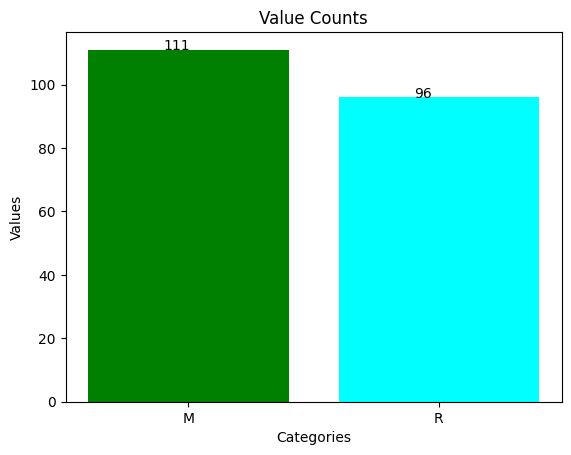

In [79]:
fig, ax = plt.subplots()
value_serie = df['R'].value_counts()
ax.bar(value_serie.index,value_serie.values,color=['green','cyan'])
ax.set_title("Value Counts")
ax.set_xlabel("Categories")
ax.set_ylabel("Values")
for p in ax.patches:
  _x = p.get_x() + p.get_width() - 0.5
  _y = p.get_y() + p.get_height()
  value = int(p.get_height())
  ax.text(_x,_y,value,ha='left')

Here we can see a slight imbalance in the labels column. To correct this, we will use a technique called **SMOTE**.
Note: This technique **DIDN'T WORK**, but this repository is for me to test and learn different things, so I'll maintain it.

In [80]:
X = df.iloc[:,:60].values
y = df['R'].values

In [81]:
oversampler = SMOTE(k_neighbors=3,random_state=5)
X,y = oversampler.fit_resample(X,y)

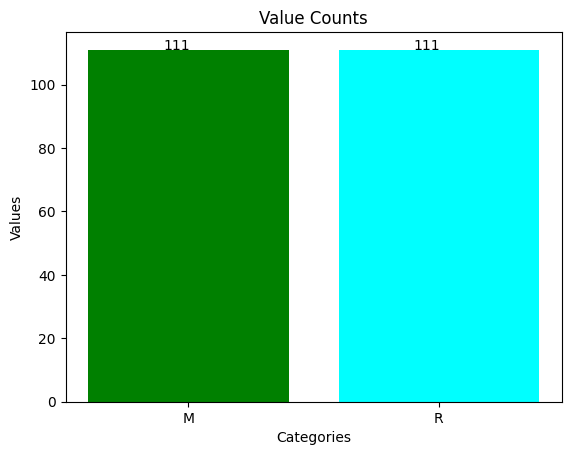

In [82]:
value, counts = np.unique(y,return_counts=True)
value_serie = pd.Series(
    counts,
    index=value
)
fig, ax = plt.subplots()
ax.bar(value_serie.index,value_serie.values,color=['green','cyan'])
ax.set_title("Value Counts")
ax.set_xlabel("Categories")
ax.set_ylabel("Values")
for p in ax.patches:
  _x = p.get_x() + p.get_width() - 0.5
  _y = p.get_y() + p.get_height()
  value = int(p.get_height())
  ax.text(_x,_y,value,ha='left')

In [83]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Searching Best Params

In [84]:
warnings.filterwarnings('ignore')
model_test = LinearDiscriminantAnalysis()
params = {
    'solver': ['svd','lsqr','eigen'],
    'shrinkage':[0.001,0.01,0.1,0.2,0.8]
}
randomized = RandomizedSearchCV(
    estimator = model_test,
    param_distributions = params,
    random_state=5
)
randomized.fit(X,y)
print(randomized.best_score_)
print(randomized.best_params_)
best_params = randomized.best_params_.copy()

0.6672727272727272
{'solver': 'lsqr', 'shrinkage': 0.001}


# Creating and Evaluating a Model

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=5,stratify=y)

In [86]:
model = LinearDiscriminantAnalysis(
  solver = best_params['solver'],
  shrinkage = best_params['shrinkage']
)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test,preds))

0.7333333333333333


In [87]:
response = input("Do you want to save the model? (Y/n): ").lower()
if response == "y":
  with open('model.pkl','wb') as f:
    pickle.dump(model,f)

Do you want to save the model? (Y/n): y
